In [2]:
# Install dependencies
!pip install requests pandas matplotlib python-dotenv


# Imports
import os
import getpass
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Make plots a bit nicer
plt.style.use("default")

# API KEY + HEADERS
API_KEY = "dd84e19792104cfb817604354b3456b0"

headers = {
    "x-api-key": API_KEY
}

BASE_URL = "https://api.gridstatus.io/v1"

# test request
resp = requests.get(f"{BASE_URL}/datasets", headers=headers)
print(resp.status_code)
data=resp.json()
data.keys()


200


dict_keys(['status_code', 'data', 'meta', 'dataset_metadata'])

In [4]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(data["data"])
df.head()

,id,name,description,earliest_available_time_utc,latest_available_time_utc,source,last_checked_time_utc,primary_key_columns,publish_time_column,time_index_column,subseries_index_column,all_columns,number_of_rows_approximate,table_type,is_in_snowflake,data_frequency,source_url,publication_frequency,is_published,status
0,aeso_daily_average_pool_price,AESO Daily Average Pool Price,Average daily prices in AESO. AESO reports out...,2000-01-01T07:00:00+00:00,2025-11-21T07:00:00+00:00,aeso,2025-11-22T17:14:25+00:00,[interval_start_utc],None,interval_start_utc,None,"[{'name': 'interval_start_utc', 'type': 'TIMES...",9448,table,True,1_DAY,https://developer-apim.aeso.ca/api-details#api...,None,True,active
1,aeso_fuel_mix,AESO Fuel Mix,Fuel mix data in AESO. This data is sampled ev...,2025-06-05T15:07:00+00:00,2025-11-22T17:13:00+00:00,aeso,2025-11-22T17:14:31+00:00,[time_utc],None,time_utc,None,"[{'name': 'time_utc', 'type': 'TIMESTAMP', 'is...",239184,table,True,1_MINUTE,https://developer-apim.aeso.ca/api-details#api...,None,True,active
2,aeso_interchange,AESO Interchange,This dataset contains the flows between AESO a...,2025-06-09T14:21:00+00:00,2025-11-22T17:13:00+00:00,aeso,2025-11-22T17:14:31+00:00,[time_utc],None,time_utc,None,"[{'name': 'time_utc', 'type': 'TIMESTAMP', 'is...",227294,table,True,1_MINUTE,https://developer-apim.aeso.ca/api-details#api...,None,True,active
3,aeso_load,AESO Load,Calculated total Alberta demand based on all t...,2000-01-01T07:00:00+00:00,2025-11-22T16:00:00+00:00,aeso,2025-11-22T17:14:26+00:00,[interval_start_utc],None,interval_start_utc,None,"[{'name': 'interval_start_utc', 'type': 'TIMES...",226918,table,True,1_HOUR,https://developer-apim.aeso.ca/api-details#api...,None,True,active
4,aeso_load_forecast,AESO Load Forecast,Forecasted and calculated total Alberta demand...,1999-12-31T14:00:00+00:00,2025-11-22T14:00:00+00:00,aeso,2025-11-22T17:14:26+00:00,"[interval_start_utc, publish_time_utc]",publish_time_utc,interval_start_utc,None,"[{'name': 'interval_start_utc', 'type': 'TIMES...",281562,table,True,1_HOUR,https://developer-apim.aeso.ca/api-details#api...,None,True,active


In [6]:
df_pjm = df[df["source"] == "pjm"]
df_pjm[["id", "name", "description"]].head(20)


,id,name,description
337,pjm_actual_and_scheduled_interchange_summary,PJM Actual And Scheduled Interchange Summary,A breakdown of hourly flows across PJM’s exter...
338,pjm_actual_operational_statistics,PJM Actual Operational Statistics,Actual load and dispatch rate data by zone. PJ...
339,pjm_area_control_error,PJM Area Control Error,Area Control Error (ACE) measures the imbalanc...
340,pjm_as_market_results_dam,PJM AS Market Results DAM,Day-ahead hourly ancillary service prices and ...
341,pjm_as_market_results_real_time,PJM AS Market Results Real Time,Real-time five-minute ancillary service prices...
342,pjm_as_market_results_real_time_hourly,PJM AS Market Results Real Time Hourly,Real-time hourly ancillary service prices and ...
343,pjm_cleared_virtuals_daily,"PJM Daily Cleared INCs, DECs and UTCs","This dataset contains the total quantity, in M..."
344,pjm_day_ahead_demand_bids,PJM Day Ahead Demand Bids,Hourly day-ahead demand bid data in PJM. This ...
345,pjm_dispatched_reserves_prelim,PJM Dispatched Reserves Prelim,"This dataset contains the quantity, requiremen..."
346,pjm_dispatched_reserves_verified,PJM Dispatched Reserves Verified,This dataset contains the five-minute verified...


In [13]:
df_lmp.columns

Index(['interval_start_utc', 'interval_end_utc', 'location', 'lmp', 'energy',
       'congestion', 'loss'],
      dtype='object')

In [18]:
df_lmp["interval_start_utc"] = pd.to_datetime(df_lmp["interval_start_utc"])

df_lmp["hour"] = df_lmp["interval_start_utc"].dt.hour

avg_by_hour = df_lmp.groupby("hour")["lmp"].mean()
avg_by_hour


hour
0    25.954307
Name: lmp, dtype: float64

In [34]:
dataset_id = "pjm_lmp_real_time_hourly"
location = "ATSI"  

resp = requests.get(
    f"{BASE_URL}/datasets/{dataset_id}/query/location/{location}",
    headers=headers,
    params={
        "start_time": "2024-01-10T00:00Z",
        "end_time":   "2024-01-11T00:00Z",
        "limit": 5000
    }
)

df_lmp = pd.DataFrame(resp.json()["data"])
df_lmp.head()


,interval_start_utc,interval_end_utc,market,location,location_id,location_short_name,location_type,lmp,energy,congestion,loss
0,2024-01-10T00:00:00+00:00,2024-01-10T01:00:00+00:00,REAL_TIME_HOURLY,ATSI,116013753,ATSI,ZONE,29.714285,27.67,1.656418,0.384534
1,2024-01-10T01:00:00+00:00,2024-01-10T02:00:00+00:00,REAL_TIME_HOURLY,ATSI,116013753,ATSI,ZONE,27.146850,24.45,2.289124,0.409393
2,2024-01-10T02:00:00+00:00,2024-01-10T03:00:00+00:00,REAL_TIME_HOURLY,ATSI,116013753,ATSI,ZONE,28.743898,25.22,3.072353,0.454878
3,2024-01-10T03:00:00+00:00,2024-01-10T04:00:00+00:00,REAL_TIME_HOURLY,ATSI,116013753,ATSI,ZONE,23.384548,21.64,1.350917,0.391965
4,2024-01-10T04:00:00+00:00,2024-01-10T05:00:00+00:00,REAL_TIME_HOURLY,ATSI,116013753,ATSI,ZONE,20.094259,18.52,1.263578,0.315681


In [35]:
df_lmp["interval_start_utc"] = pd.to_datetime(df_lmp["interval_start_utc"])



In [36]:
df_lmp = df_lmp.sort_values("interval_start_utc")


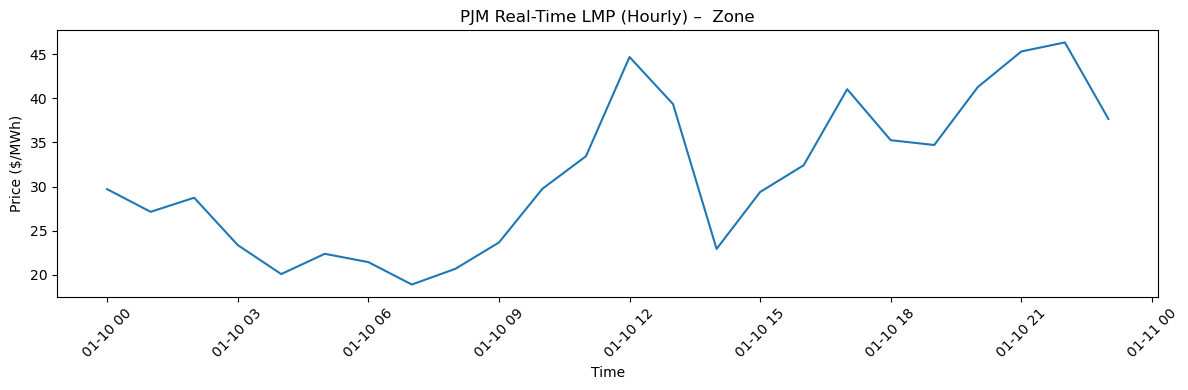

In [37]:
plt.figure(figsize=(12,4))
plt.plot(df_lmp["interval_start_utc"], df_lmp["lmp"])
plt.title("PJM Real-Time LMP (Hourly) –  ATSI")
plt.xlabel("Time")
plt.ylabel("Price ($/MWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
# HELPER FUNCTION: GET PJM LMP DATA
# -------------------------------------------------------
def get_pjm_lmp(start_time, end_time, location="ATSI"):
    """
    Retrieve PJM Real-Time Hourly LMP for a given time range and location.
    - start_time, end_time: ISO timestamps
    - location: PJM zone (ATSI for Bowling Green)
    Returns:
    - Clean pandas DataFrame: timestamps + price components
    """
    dataset_id = "pjm_lmp_real_time_hourly"
    
    # API request
    resp = requests.get(
        f"{BASE_URL}/datasets/{dataset_id}/query/location/{location}",
        headers=headers,
        params={
            "start_time": start_time,
            "end_time": end_time,
            "limit": 50000
        }
    )
    
    # Convert JSON to DataFrame
    df = pd.DataFrame(resp.json()["data"])
    
    # Convert timestamps
    df["interval_start_utc"] = pd.to_datetime(df["interval_start_utc"])
    
    # Sort by time
    df = df.sort_values("interval_start_utc")
    
    return df

### Understanding Timestamps (ISO 8601)

'''GridStatus API requires timestamps in ISO 8601 UTC format:

    YYYY-MM-DDTHH:MMZ

- `T` separates date and time  
- `Z` means UTC timezone  
- `00:00` means midnight  
- Using `T00:00Z` gives clean day boundaries

Example:
`2024-01-01T00:00Z` → Jan 1st at 12:00 AM UTC'''

Winter Day Analysis

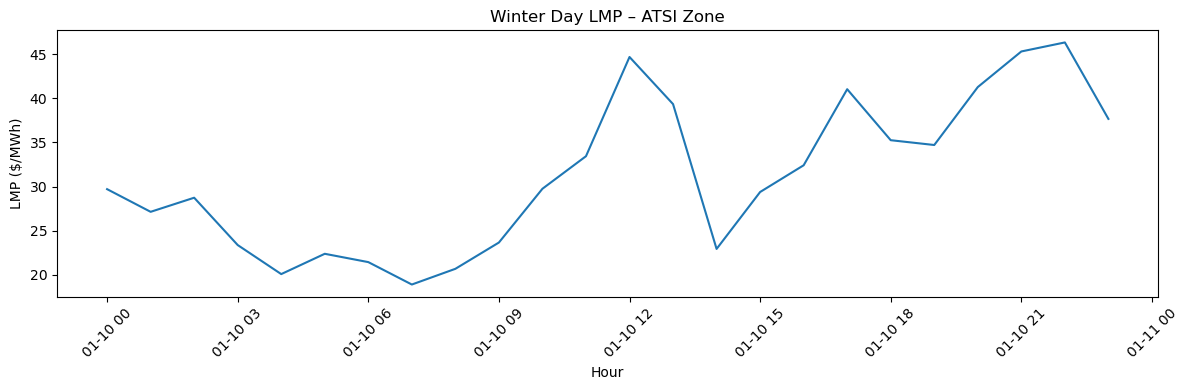

In [39]:
# -------------------------------------------------------
# WINTER DAY: Jan 10, 2024
# -------------------------------------------------------
winter_start = "2024-01-10T00:00Z"
winter_end   = "2024-01-11T00:00Z"

df_winter = get_pjm_lmp(winter_start, winter_end, "ATSI")

# Plot winter LMP
plt.figure(figsize=(12,4))
plt.plot(df_winter["interval_start_utc"], df_winter["lmp"])
plt.title("Winter Day LMP – ATSI Zone")
plt.xlabel("Hour")
plt.ylabel("LMP ($/MWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summer Day Analysis

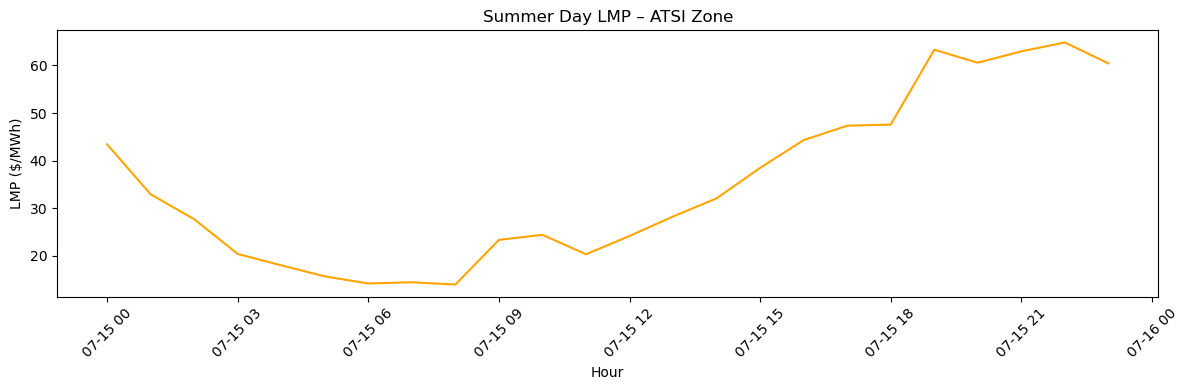

In [40]:
# -------------------------------------------------------
# SUMMER DAY: July 15, 2024
# -------------------------------------------------------
summer_start = "2024-07-15T00:00Z"
summer_end   = "2024-07-16T00:00Z"

df_summer = get_pjm_lmp(summer_start, summer_end, "ATSI")

# Plot summer LMP
plt.figure(figsize=(12,4))
plt.plot(df_summer["interval_start_utc"], df_summer["lmp"], color="orange")
plt.title("Summer Day LMP – ATSI Zone")
plt.xlabel("Hour")
plt.ylabel("LMP ($/MWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


One-Week Analysis

In [41]:
# -------------------------------------------------------
# ONE WEEK: Jan 1–7, 2024
# -------------------------------------------------------
week_start = "2024-01-01T00:00Z"
week_end   = "2024-01-08T00:00Z"

df_week = get_pjm_lmp(week_start, week_end, "ATSI")

# Add hour column for hourly averages
df_week["hour"] = df_week["interval_start_utc"].dt.hour

avg_by_hour = df_week.groupby("hour")["lmp"].mean()
avg_by_hour


hour
0     38.886546
1     38.519495
2     37.048067
3     30.332414
4     29.924432
5     44.519205
6     28.105271
7     32.802387
8     25.644763
9     25.647149
10    25.175715
11    32.838747
12    36.405797
13    33.575410
14    30.282554
15    32.340929
16    30.197306
17    31.131386
18    34.234993
19    28.537943
20    29.746059
21    32.204373
22    47.682562
23    42.789828
Name: lmp, dtype: float64

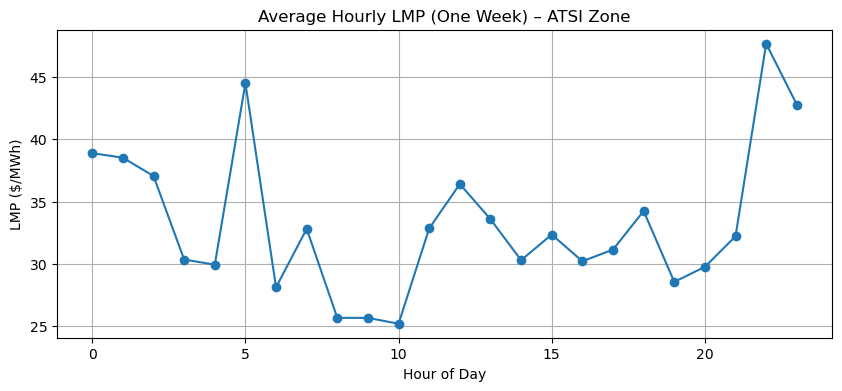

In [42]:
plt.figure(figsize=(10,4))
avg_by_hour.plot(marker="o")
plt.title("Average Hourly LMP (One Week) – ATSI Zone")
plt.xlabel("Hour of Day")
plt.ylabel("LMP ($/MWh)")
plt.grid(True)
plt.show()


In [43]:
solar_hours = avg_by_hour.loc[10:14].mean()  # solar noon
peak_hours  = avg_by_hour.loc[17:20].mean()  # evening peak
min_price = df_week["lmp"].min()
max_price = df_week["lmp"].max()
overall_avg = df_week["lmp"].mean()

solar_hours, peak_hours, min_price, max_price, overall_avg


(np.float64(31.655644485714287),
 np.float64(30.91259542857143),
 16.587758,
 128.887738,
 np.float64(33.27388876785714))